<a href="https://colab.research.google.com/github/AshSama12/online-shoppers-purchasing-intention-dataset-analyze/blob/main/shopping_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EC9630 Machine Learning - Laboratory 5

Task - UNSUPERVISED LEARNING

Name - SAMARANAYAKE T.A.G.A.M

Reg No - 2020E139

Date - 09. 08. 2024

Time - 8.00 AM

In [1]:
import zipfile

# Define the path to the zip file
zip_file_path = '/content/online+shoppers+purchasing+intention+dataset.zip'
extract_dir = '/content/online_shoppers/'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
!ls /content/online_shoppers/


online_shoppers_intention.csv


In [2]:
import pandas as pd

# Load the dataset (assuming it's a CSV file)
file_path = '/content/online_shoppers/online_shoppers_intention.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [3]:
# Display the first few rows
df.head()

# Display basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get a summary of statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

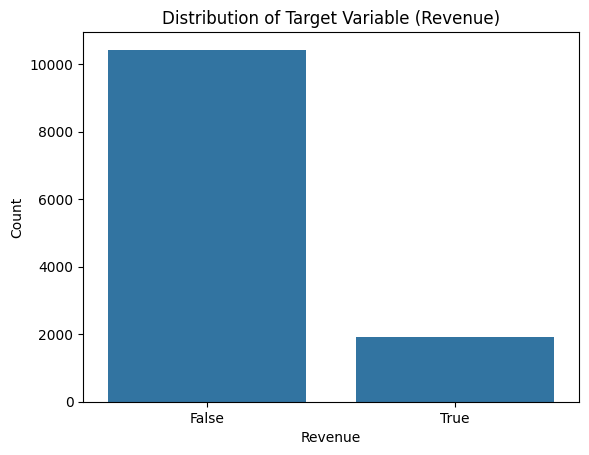

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (Revenue)
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Target Variable (Revenue)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()


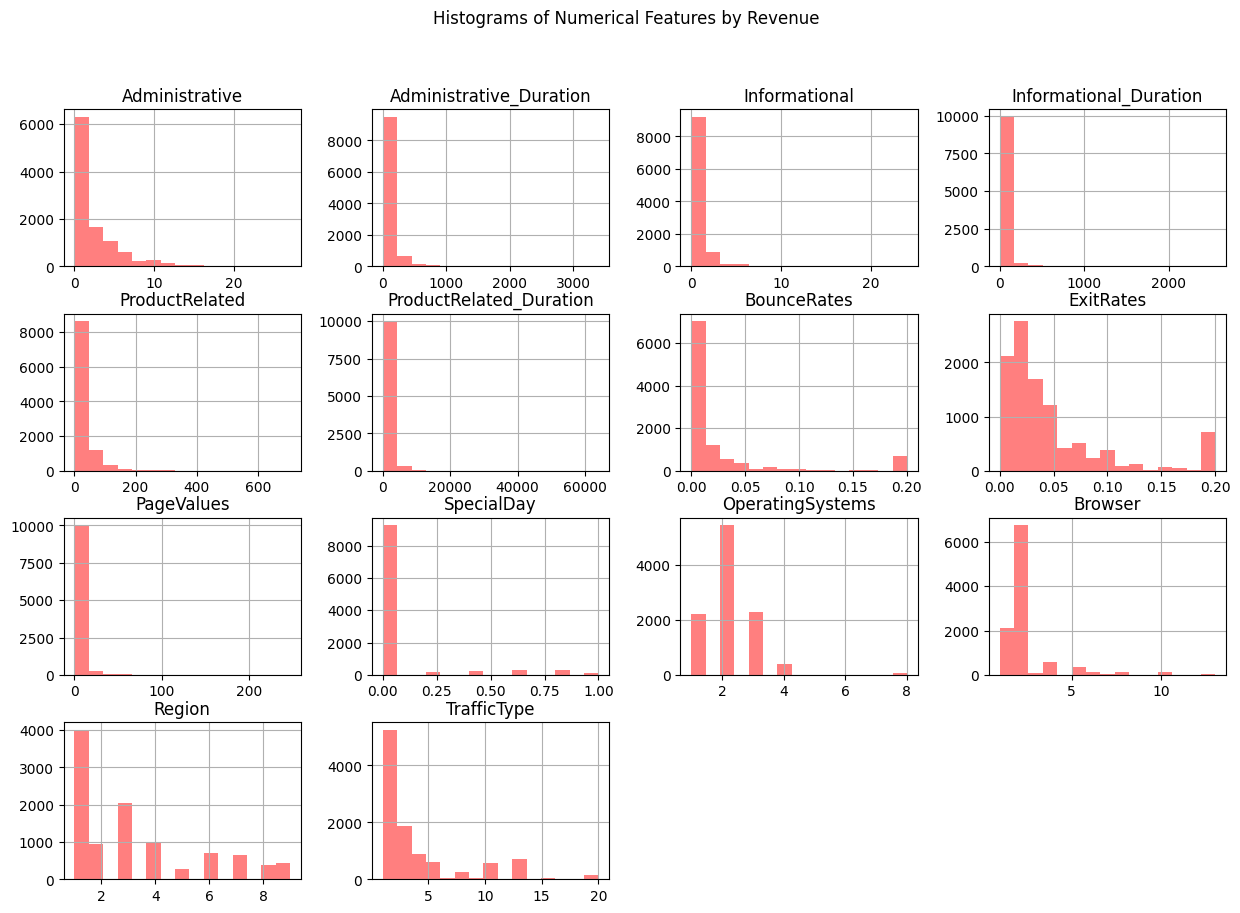

In [5]:
# Plot histograms for numerical features, separated by the target variable
df[df['Revenue'] == True].hist(bins=15, color='blue', alpha=0.5, figsize=(15, 10), label='Revenue = True')
df[df['Revenue'] == False].hist(bins=15, color='red', alpha=0.5, figsize=(15, 10), label='Revenue = False')
plt.suptitle('Histograms of Numerical Features by Revenue')
plt.legend()
plt.show()


In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


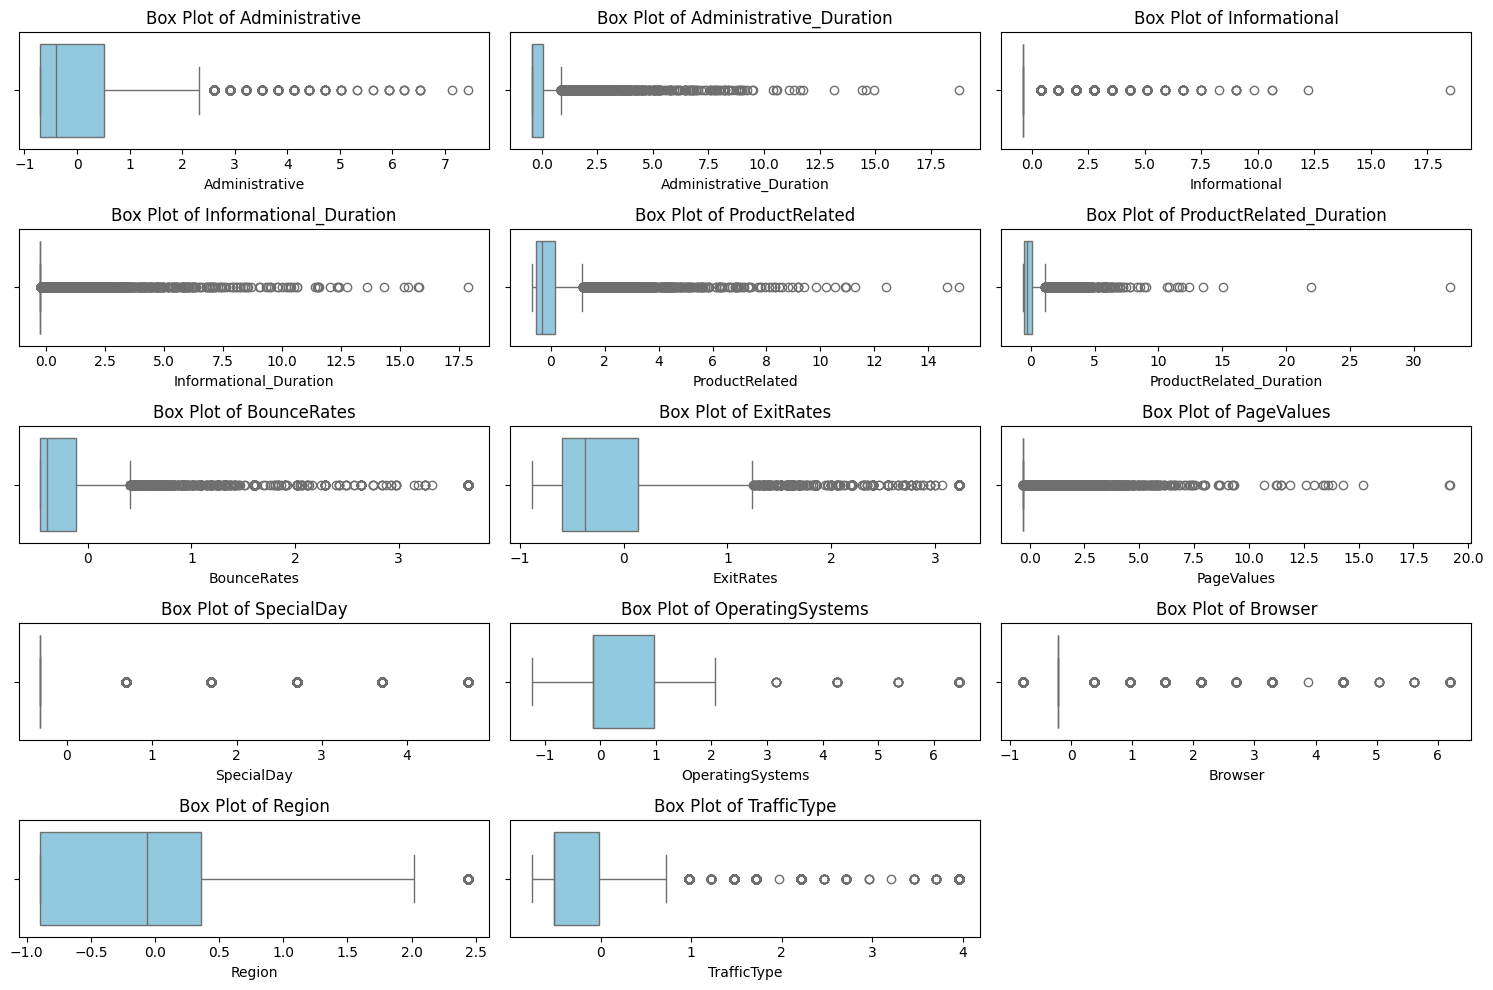

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df_encoded, x=col, color='skyblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [12]:
categorical_cols = df_encoded.select_dtypes(include=['uint8']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i + 1)
    sns.countplot(data=df_encoded, x=col, palette='pastel')
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

In [8]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Feb  Month_Jul  \
0         0.20       0.20         0.0         0.0  ...       True      False   
1         0.00       0.10         0.0         0.0  ...       True      False   
2         0.20       0.20         0.0         0.0  ...       True      False   
3         0.05       0.14         0.0         0.0  ...       True      False   
4         0.02       0.05         0.0         0.0  ...       True      False   

   Month_June  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
0       False      False      False      False      False      False   
1       False      False      False      False      False      False   
2       False      False      False      False      False      False   
3       False      False      False      False      False      False   
4       False      False      False      False      False      False   

   VisitorType_Other  VisitorType_Returning_Visitor  
0              False                           True  
1              False                           True  
2              False                           True  
3              False                           True  
4              False                           True  

[5 rows x 27 columns]

In [9]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns in the encoded dataset
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the scaled dataset
df_encoded.head()


Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Feb  Month_Jul  \
0     3.667189   3.229316   -0.317178   -0.308821  ...       True      False   
1    -0.457683   1.171473   -0.317178   -0.308821  ...       True      False   
2     3.667189   3.229316   -0.317178   -0.308821  ...       True      False   
3     0.573535   1.994610   -0.317178   -0.308821  ...       True      False   
4    -0.045196   0.142551   -0.317178   -0.308821  ...       True      False   

   Month_June  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
0       False      False      False      False      False      False   
1       False      False      False      False      False      False   
2       False      False      False      False      False      False   
3       False      False      False      False      False      False   
4       False      False      False      False      False      False   

   VisitorType_Other  VisitorType_Returning_Visitor  
0              False                           True  
1              False                           True  
2              False                           True  
3              False                           True  
4              False                           True  

[5 rows x 27 columns]

In [10]:
# Check the structure of the preprocessed dataset
df_encoded.info()

# Display summary statistics for the preprocessed dataset
df_encoded.describe()

# Check the first few rows of the preprocessed dataset
df_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  float64
 11  Browser                        12330 non-null  float64
 12  Region                         12330 non-null 

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Feb  Month_Jul  \
0     3.667189   3.229316   -0.317178   -0.308821  ...       True      False   
1    -0.457683   1.171473   -0.317178   -0.308821  ...       True      False   
2     3.667189   3.229316   -0.317178   -0.308821  ...       True      False   
3     0.573535   1.994610   -0.317178   -0.308821  ...       True      False   
4    -0.045196   0.142551   -0.317178   -0.308821  ...       True      False   

   Month_June  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
0       False      False      False      False      False      False   
1       False      False      False      False      False      False   
2       False      False      False      False      False      False   
3       False      False      False      False      False      False   
4       False      False      False      False      False      False   

   VisitorType_Other  VisitorType_Returning_Visitor  
0              False                           True  
1              False                           True  
2              False                           True  
3              False                           True  
4              False                           True  

[5 rows x 27 columns]

In [14]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (9864, 26)
Test set shape: (2466, 26)


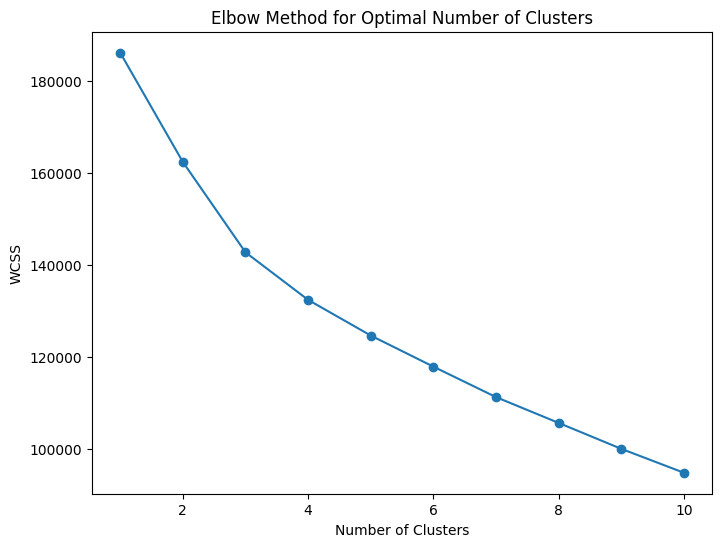

In [15]:
from sklearn.cluster import KMeans

# Calculate the WCSS (Within-Cluster Sum of Squares) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


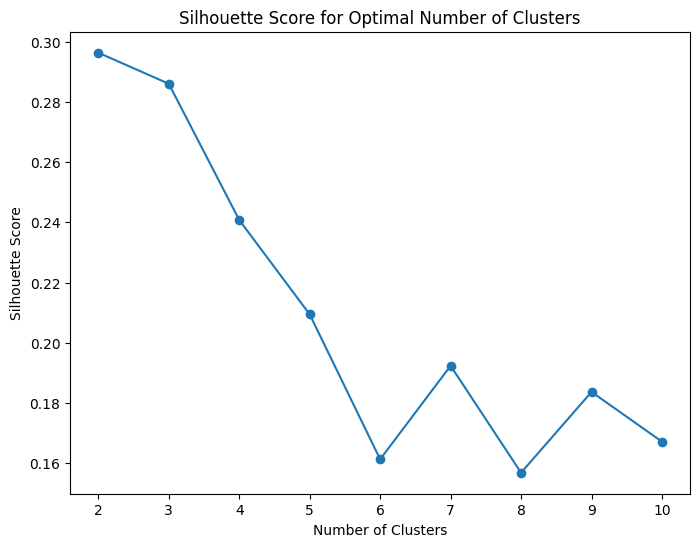

In [16]:
from sklearn.metrics import silhouette_score

# Compute the silhouette scores for different numbers of clusters
sil_scores = []
for i in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, y_kmeans))

# Plot the Silhouette Score graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


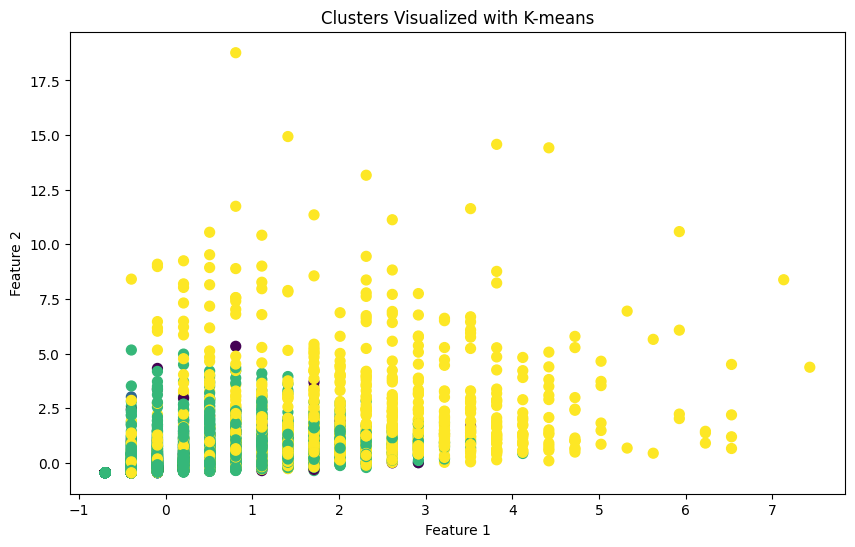

In [17]:
# Fit K-means with the chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('Clusters Visualized with K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [18]:
from sklearn.mixture import GaussianMixture

# Initialize GMM with a specific number of components (e.g., 4)
gmm = GaussianMixture(n_components=4, init_params='kmeans', random_state=42)


In [19]:
# Fit the GMM model to the data
gmm.fit(X)


GaussianMixture(n_components=4, random_state=42)

In [20]:
# Print the convergence info
print(f"Converged: {gmm.converged_}")


Converged: True


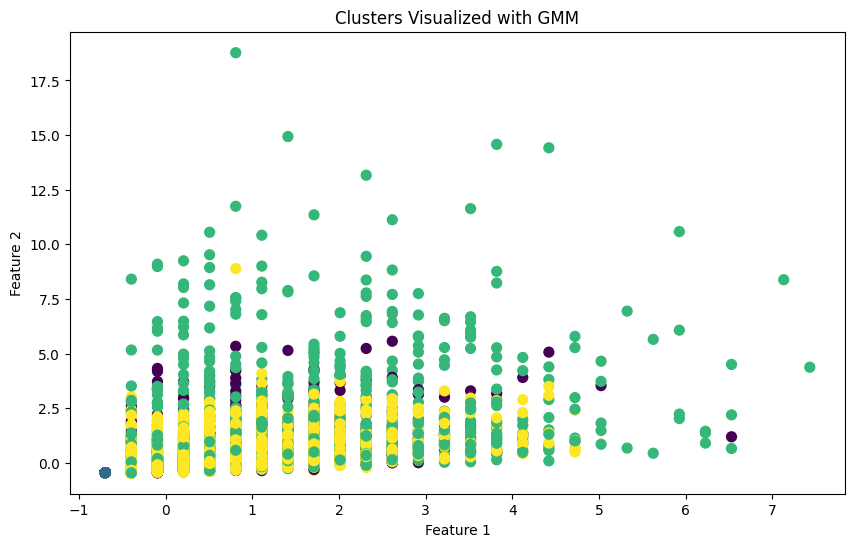

In [21]:
# Predict cluster labels
y_gmm = gmm.predict(X)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Clusters Visualized with GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [22]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# K-means metrics
silhouette_kmeans = silhouette_score(X, y_kmeans)
calinski_kmeans = calinski_harabasz_score(X, y_kmeans)
davies_kmeans = davies_bouldin_score(X, y_kmeans)

# GMM metrics
silhouette_gmm = silhouette_score(X, y_gmm)
calinski_gmm = calinski_harabasz_score(X, y_gmm)
davies_gmm = davies_bouldin_score(X, y_gmm)

# Print metrics
print(f"K-means Silhouette Score: {silhouette_kmeans}")
print(f"K-means Calinski-Harabasz Score: {calinski_kmeans}")
print(f"K-means Davies-Bouldin Score: {davies_kmeans}")

print(f"GMM Silhouette Score: {silhouette_gmm}")
print(f"GMM Calinski-Harabasz Score: {calinski_gmm}")
print(f"GMM Davies-Bouldin Score: {davies_gmm}")


K-means Silhouette Score: 0.2407903838939756
K-means Calinski-Harabasz Score: 1667.7534385301167
K-means Davies-Bouldin Score: 1.5479781303909985
GMM Silhouette Score: 0.023520371993217114
GMM Calinski-Harabasz Score: 782.81867531972
GMM Davies-Bouldin Score: 3.1199502751823895
